In [1]:
import os
import pandas as pd

#encoder
from sklearn.preprocessing import LabelEncoder

#split data
from sklearn.model_selection import train_test_split
import pickle

#scalling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Callbacks
from tensorflow.keras.callbacks import EarlyStopping

#report evaluation model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#load model
from keras.models import load_model

In [2]:
current_directory = os.path.dirname(os.path.abspath("Churn Prediction.ipynb"))

In [3]:
df = pd.read_csv(current_directory + "\\clean_dataset_EDA.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Encoding

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [6]:
#Check non numerical unique values
object_type_data = {column: list(df[column].unique()) for column in df.select_dtypes(object).columns}
for key, value in object_type_data.items():
    print(f'{key}: {value}')

gender: ['Female', 'Male']
Partner: ['Yes', 'No']
Dependents: ['No', 'Yes']
PhoneService: ['No', 'Yes']
MultipleLines: ['No', 'Yes']
InternetService: ['DSL', 'Fiber optic', 'No']
OnlineSecurity: ['No', 'Yes']
OnlineBackup: ['Yes', 'No']
DeviceProtection: ['No', 'Yes']
TechSupport: ['No', 'Yes']
StreamingTV: ['No', 'Yes']
StreamingMovies: ['No', 'Yes']
Contract: ['Month-to-month', 'One year', 'Two year']
PaperlessBilling: ['Yes', 'No']
PaymentMethod: ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn: ['No', 'Yes']


In [7]:
object_type_data = {column: list(df[column].unique()) for column in df.select_dtypes(object).columns}
binary_columns = []
for key, value in object_type_data.items():
    if len(value) == 2:
        binary_columns.append(key)

## Binary Columns

In [8]:
object_type_data = {column: list(df[column].unique()) for column in df.select_dtypes(object).columns}
binary_columns = []
for key, value in object_type_data.items():
    if len(value) == 2:
        binary_columns.append(key)

print(binary_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


In [9]:
le = LabelEncoder()
for column in binary_columns:
    df[column] = le.fit_transform(df[column])

## One Hot Encoding

In [10]:
#Check non numerical unique values
object_type_data = {column: list(df[column].unique()) for column in df.select_dtypes(object).columns}
for key, value in object_type_data.items():
    print(f'{key}: {value}')

InternetService: ['DSL', 'Fiber optic', 'No']
Contract: ['Month-to-month', 'One year', 'Two year']
PaymentMethod: ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']


In [11]:
df = pd.get_dummies(data=df, columns=['PaymentMethod'], dtype=int)

In [12]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,DSL,0,1,...,0,Month-to-month,1,29.85,29.85,0,0,0,1,0
1,1,0,0,0,34,1,0,DSL,1,0,...,0,One year,0,56.95,1889.50,0,0,0,0,1
2,1,0,0,0,2,1,0,DSL,1,1,...,0,Month-to-month,1,53.85,108.15,1,0,0,0,1
3,1,0,0,0,45,0,0,DSL,1,0,...,0,One year,0,42.30,1840.75,0,1,0,0,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,0,Month-to-month,1,70.70,151.65,1,0,0,1,0


## Ordinal Encoding

In [13]:
#Ordering list
internet_order = ['No', 'DSL', 'Fiber optic']
contract_order = ['Month-to-month', 'One year', 'Two year']

#ordinal encoding
df['InternetService'] = df['InternetService'].apply(lambda x: internet_order.index(x))
df['Contract'] = df['Contract'].apply(lambda x: contract_order.index(x))

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,0,0,1,29.85,29.85,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,0,1,0,56.95,1889.50,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,0,0,1,53.85,108.15,1,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,0,1,0,42.30,1840.75,0,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,0,0,1,70.70,151.65,1,0,0,1,0


In [15]:
df.to_csv('clean_dataset_Training.csv', index = False)

# Splitting Data Train, Test, Validation

https://www.tensorflow.org/tfx/tutorials/transform/census

In [16]:
current_directory = os.path.dirname(os.path.abspath("Churn Prediction.ipynb"))

In [17]:
df = pd.read_csv(current_directory + "\\clean_dataset_Training.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,0,0,1,29.85,29.85,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,0,1,0,56.95,1889.50,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,0,0,1,53.85,108.15,1,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,0,1,0,42.30,1840.75,0,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,0,0,1,70.70,151.65,1,0,0,1,0


In [18]:
df.shape

(7043, 23)

In [19]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [20]:
X_train, X_tempt, y_train, y_tempt = train_test_split(X, y, train_size= 0.6, stratify= y, random_state= 42)

In [21]:
X_test, X_valid, y_test, y_valid = train_test_split(X_tempt, y_tempt, test_size= 0.5, stratify= y_tempt, random_state= 42)

# Feature Scalling

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
InternetService                              int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
Contract                                     int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
PaymentMethod_Bank transfer (au

In [24]:
object_type_data = {column: list(df[column].unique()) for column in df.select_dtypes('number').columns}
scale_column = []
for key, value in object_type_data.items():
    if len(value) > 10:
        scale_column.append(key)

print(scale_column)

['tenure', 'MonthlyCharges', 'TotalCharges']


In [25]:
scaler = MinMaxScaler()
X_train[scale_column] = scaler.fit_transform(X_train[scale_column])
X_test[scale_column] = scaler.fit_transform(X_test[scale_column])
X_valid[scale_column] = scaler.fit_transform(X_valid[scale_column])

In [26]:
X_train.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
816,0,0,0,0,0.014085,1,0,2,0,0,...,0,1,0,1,0.675635,0.018446,0,0,0,1
5284,0,1,0,0,0.056338,0,0,1,0,0,...,1,1,0,0,0.272048,0.020673,0,0,1,0
3300,0,0,1,1,0.450704,1,0,0,0,0,...,0,0,1,0,0.016941,0.064684,0,0,0,1
592,1,0,1,1,0.873239,1,1,1,1,1,...,1,1,2,0,0.648729,0.624992,0,1,0,0
859,1,0,1,1,1.000000,0,0,1,1,1,...,1,1,2,1,0.462382,0.542456,0,1,0,0


# Training Dataset

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Activation

In [28]:
model = Sequential()
model.add(Dense(20, input_shape=(22,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer = 'adam',
              loss= 'binary_crossentropy',
              metrics = ['Accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                460       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [30]:
my_callbacks = [
    EarlyStopping(monitor='val_loss', patience = 5, verbose=1)]

In [31]:
history = model.fit(X_train, 
                    y_train,
                    batch_size = 32,
                    epochs=50,
                    validation_data=(X_valid, y_valid),
                    verbose=1,
                    callbacks=my_callbacks)

Epoch 1/20


133/133 [==============================] - 4s 9ms/step - loss: 0.5523 - Accuracy: 0.7030 - val_loss: 0.4840 - val_Accuracy: 0.7516
Epoch 2/20
133/133 [==============================] - 1s 7ms/step - loss: 0.4559 - Accuracy: 0.7676 - val_loss: 0.4515 - val_Accuracy: 0.7700
Epoch 3/20
133/133 [==============================] - 1s 6ms/step - loss: 0.4341 - Accuracy: 0.7896 - val_loss: 0.4445 - val_Accuracy: 0.7693
Epoch 4/20
133/133 [==============================] - 1s 6ms/step - loss: 0.4281 - Accuracy: 0.7969 - val_loss: 0.4423 - val_Accuracy: 0.7686
Epoch 5/20
133/133 [==============================] - 1s 6ms/step - loss: 0.4249 - Accuracy: 0.7993 - val_loss: 0.4411 - val_Accuracy: 0.7779
Epoch 6/20
133/133 [==============================] - 1s 6ms/step - loss: 0.4239 - Accuracy: 0.7986 - val_loss: 0.4411 - val_Accuracy: 0.7736
Epoch 7/20
133/133 [==============================] - 1s 8ms/step - loss: 0.4215 - Accuracy: 0.8009 - val_loss: 0.4395 - val_Accuracy: 0.7786
Epoc

In [32]:
import matplotlib.pyplot as plt

In [33]:
def plot_history(history):
    plt.style.use('ggplot')
    
    acc = history.history['Accuracy']
    val_acc = history.history['val_Accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training & Validation Accuracy')
    plt.ylim([0, 1])
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training & Validation Loss')
    plt.ylim([0, 1])
    plt.legend()
    
    # plt.savefig('image.png')

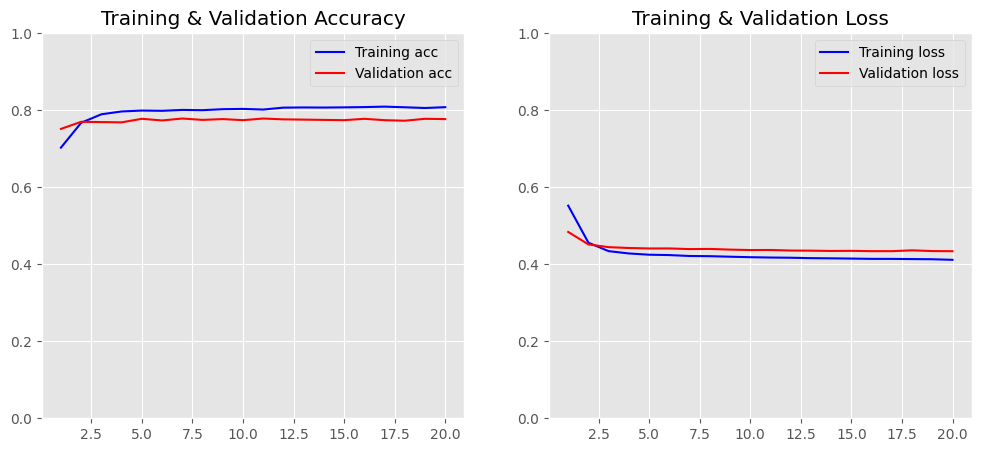

In [34]:
%matplotlib inline
plot_history(history)

# Evaluate

In [35]:
model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 4ms/step - loss: 0.4075 - Accuracy: 0.8070


[0.4075206518173218, 0.8069552779197693]

In [42]:
from collections import Counter

In [43]:
Counter(y_train)

Counter({0: 3104, 1: 1121})

In [44]:
Counter(y_test)

Counter({0: 1035, 1: 374})

In [36]:
y_test

3080    0
2079    0
4018    0
5057    0
4587    0
       ..
6362    0
1388    0
3787    0
4126    0
449     0
Name: Churn, Length: 1409, dtype: int64

In [37]:
prediction = model.predict(X_test)

45/45 [==============================] - 0s 4ms/step


In [38]:
matrix_test = classification_report(y_test, [1 if x >= 0.5 else 0 for x in prediction])
print('Testing Selesai')
print(matrix_test)

Testing Selesai
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.67      0.55      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



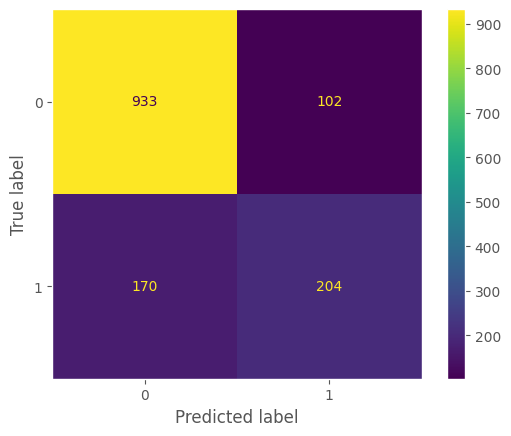

In [39]:
cm = confusion_matrix(y_test, [1 if x >= 0.5 else 0 for x in prediction])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.grid(False)
# plt.savefig('matrix_display.png')
plt.show()